# ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [1]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$
g(z)=\frac{1}{1+e^{-x}}
$$

線形回帰の仮定関数は次の式でした。

$$
h_\theta(x)=\theta^T\cdot x
$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T\cdot x}}
$$

x: 特徴量ベクトル


θ: パラメータ（重み）ベクトル

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """    
    return np.dot(X, self.coef_[1:]) + self.coef_[0]

In [4]:
def sigmoid(self, X):
    """
    ロジスティック回帰の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      仮定関数による推定結果

    """  
    net_input = self._linear_hypothesis(X)
    return 1 / (1 + np.exp(-net_input))

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha\frac{\partial J(\theta)}{\partial \theta_j}
$$
$$
\frac{\partial J(\theta)}{\partial\theta_0}=\frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}] , j=0
$$
$$
\frac{\partial J(\theta)}{\partial \theta_j}=(\frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]) + \frac{\lambda}{m}\theta_j, j≥1
$$

α: 学習率


i: サンプルのインデックス


j: 特徴量のインデックス


m: 入力されるデータの数


hθ(): 仮定関数


x: 特徴量ベクトル


θ: パラメータ（重み）ベクトル


x(i): i番目のサンプルの特徴量ベクトル


y(i): i番目のサンプルの正解ラベル


θj: j番目のパラメータ（重み）


λ: 正則化パラメータ


In [5]:
def _gradient_descent(self, X, y, reg):
    """
    最急降下法より学習させる
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    y: 次の形のndarray, shape (n_samples)
     目的変数
     
    reg: float
     正則化パラメータ

    Returns
    -------
      self: object
      最急降下法による学習結果
    """
    
    #線形の仮定関数による推定結果の呼び出し
    output = self.sigmoid(X)
    #誤差を計算
    error = (y - output)
    #重みの計算 y.shape[0]はデータ数m
    self.coef_[1:] += self.lr * (np.dot(X.T, error) / y.shape[0]
                       + reg / y.shape[0] * self.coef_[1:])
    self.coef_[0] += self.lr * error.sum() / y.shape[0]

    return self

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 hθ(x)の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [6]:
def predict(self, X):
    """
    ロジスティック回帰を使いラベルを推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    return np.where(self._linear_hypothesis(X) >= 0.0, 1, 0)

In [7]:
def predict_proba(self, X):
    """
    ロジスティック回帰を使い確率を推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    
    return self._linear_hypothesis(X)

## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{m}\theta_j^2
$$

m: 入力されるデータの数


hθ(): 仮定関数


x: 特徴量ベクトル


θ: パラメータ（重み）ベクトル


x(i): i番目のサンプルの特徴量ベクトル


y(i): i番目のサンプルの正解ラベル


θj: j番目のパラメータ（重み）


n: 特徴量の数


λ: 正則化パラメータ

In [8]:
def cost(X, y, reg):
    cost = (np.dot(-y, np.log(sigmoid(X))) 
    - np.dot((1 - y), np.log(1-sigmoid(X)))) / y.shape[0]
    + reg / 2 / y.shape[0] * (self.coef_[1:]**2).sum()
    
    return cost

# 検証

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [9]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    reg: float
     正則化パラメータ
    random_state: int
    パラメータ初期化のための乱数シード

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    
    def __init__(self, num_iter, lr, no_bias, verbose, reg, random_state):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        #正則化パラメータ
        self.reg = reg
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        #self.val_loss = np.zeros(self.iter)
        
        #パラメータ初期化のための乱数シード
        self.random_state = random_state
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        #パラメータの初期化
        rgen = np.random.RandomState(self.random_state)
        #パラメータにバイアス項を含むか
        if self.no_bias:
            self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        else:
            self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
            
        #学習結果の呼び出し
        _gradient_descent = self._gradient_descent(X, y) 
        
        #verboseをTrueにした際は学習過程を出力
        if self.verbose:
            print(self.loss)              
        
        return _gradient_descent
    
    def _gradient_descent(self, X, y):
        """
        最急降下法より学習させる
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        y: 次の形のndarray, shape (n_samples)
         目的変数

        reg: float
         正則化パラメータ

        Returns
        -------
          self: object
          最急降下法による学習結果
        """
        
        for i in range(self.iter):            
            #シグモイド関数による推定結果の呼び出し 
            output = self.sigmoid(X)
            #誤差を計算
            error = (y - output)
            #重みの計算 y.shape[0]はデータ数m
            if self.no_bias:
                self.coef_ += (self.lr / y.shape[0] * np.dot(X.T, error) 
                               + self.reg / y.shape[0] * self.coef_)
            else:                
                self.coef_[1:] += self.lr * (np.dot(X.T, error) / y.shape[0] 
                                + self.reg / y.shape[0] * self.coef_[1:])

                self.coef_[0] += self.lr * error.sum() / y.shape[0]
            #コスト関数の計算
            cost = self.cost(X, y)
            #コスト関数の値を格納
            self.loss[i] = cost
            
        return self
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """    
        return np.dot(X, self.coef_[1:]) + self.coef_[0]
    
    def sigmoid(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          仮定関数による推定結果

        """  
        net_input = self._linear_hypothesis(X)
        return 1 / (1 + np.exp(-net_input))
    
    def cost(self, X, y):
        cost = (np.dot(-y, np.log(self.sigmoid(X))) 
        - np.dot((1 - y), np.log(1-self.sigmoid(X)))) / y.shape[0]
        + self.reg / 2 / y.shape[0] * (self.coef_[1:]**2).sum()
        
        return cost

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        return np.where(self.sigmoid(X) >= 0.5, 1, 0)
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        #0-1の値を返す　この値は目的変数が1となる確率と捉えることができる
        return self.sigmoid(X)

In [10]:
#irisデータ読み込み

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y =iris.target

In [11]:
y =iris.target.reshape(len(y), 1)
data = np.concatenate([X, y], axis=1)
data = data[data[:, 4]!=0]
X_org = data[:, 0:4]
y_org = data[:, 4]
y_org = np.where(y_org==1, 0, 1)
y_org

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
#標準化

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X_org)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y_org, train_size=0.7)

In [14]:
slr = ScratchLogisticRegression(num_iter=1500, 
                              lr=0.05, 
                              no_bias=False, 
                              verbose=False,
                              reg=1,
                             random_state=1)

slr.fit(X_train, y_train)

In [15]:
y_pred = slr.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1])

In [16]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1])

In [17]:
#識別精度の評価
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  0.9333333333333333
Precision:  0.8666666666666667
Recall:  1.0


## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

In [18]:
#検証データ

slr2 = ScratchLogisticRegression(num_iter=1500, 
                              lr=0.05, 
                              no_bias=False, 
                              verbose=False,
                              reg=1,
                             random_state=1)

slr2.fit(X_test, y_test)

C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\ipykernel_launcher.py:157: RuntimeWarning: divide by zero encountered in log


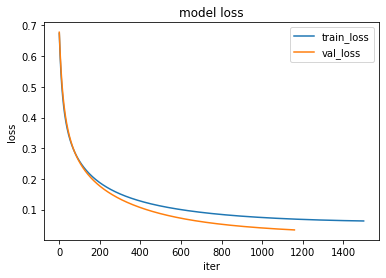

In [19]:
plt.plot(range(1, slr.iter + 1), slr.loss, label='train_loss')
plt.plot(range(1, slr2.iter + 1), slr2.loss, label='val_loss')
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('model loss')
plt.legend()

plt.show()

## 【問題7】決定領域の可視化
決定領域を可視化してください。

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [21]:
X_d2 = X_org[:, [0, 2]]
X_d2_std = sc_x.fit_transform(X_d2)
X_d2_std.shape, y_org.shape

((100, 2), (100,))

In [22]:
slr3 = ScratchLogisticRegression(num_iter=1500, 
                              lr=0.05, 
                              no_bias=False, 
                              verbose=False,
                              reg=1,
                             random_state=1)

slr3.fit(X_d2_std, y_org)

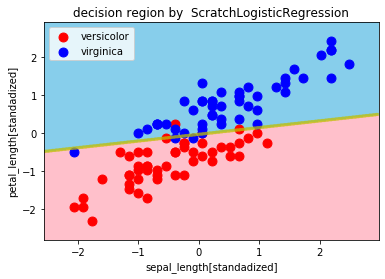

In [23]:
decision_region(X=X_d2_std, y=y_org, model=slr3, title='decision region by  ScratchLogisticRegression', xlabel='sepal_length[standadized]', ylabel='petal_length[standadized]')

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。


pickle — Python オブジェクトの直列化 — Python 3.7.4 ドキュメント


numpy.savez — NumPy v1.17 Manual



In [24]:
import pickle

In [25]:
#訓練データの学習モデルを保存

filename = 'finalized_model.sav'
pickle.dump(slr, open(filename, 'wb'))

In [26]:
#保存したモデルをロードする

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(y_test)
print(result)

[0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1]
[0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1]
